In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return 3 * x ** 2 - 4 * x + 5

In [3]:
f(3.0)

20.0

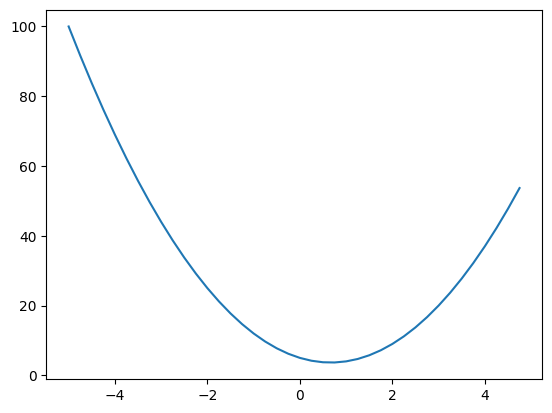

In [4]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [5]:
h = 0.00000001
x = 2/3

print(f(x))

print((f(x + h) - f(x)) / h)

3.666666666666667
0.0


In [6]:
a = 2
b = -3
c = 10

def g(a, b, c):
    return a * b + c

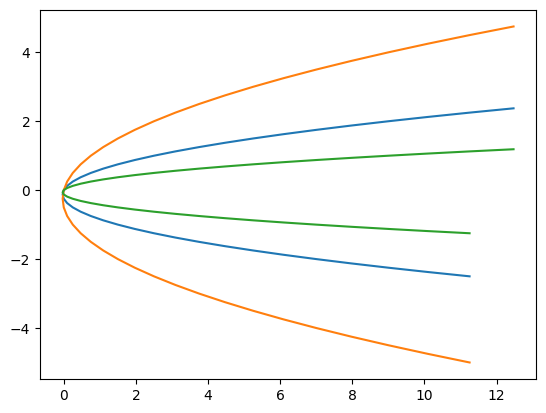

In [7]:
l = np.arange(-2.5, 2.5, 0.125)
m = np.arange(-5, 5, 0.25)
n = np.arange(-1.25, 1.25, 0.0625)
p = g(l, m, n)

plt.plot(p, l)
plt.plot(p, m)
plt.plot(p, n)

In [8]:
h = 0.000001

a = 2
b = -3
c = 10

d = g(a, b, c)

In [9]:
print(f"g(a, b, c)= {g(a, b, c)}")

dgda = (g(a + h, b, c) - g(a, b, c)) / h
dgdb = (g(a, b+h, c) - g(a, b, c)) / h
dgdc = (g(a, b, c+h) - g(a, b, c)) / h

print(f"dg/da = {dgda}")
print(f"dg/db = {dgdb}")
print(f"dg/dc = {dgdc}")

g(a, b, c)= 4
dg/da = -3.000000000419334
dg/db = 2.000000000279556
dg/dc = 0.9999999992515995


In [10]:
class Value:
    def __init__(self, data, children = [], _op = "", label="") -> None:
        self.data = data
        self._prev = set(children)
        self._op = _op
        self.grad = 0  
        self.label = label

    def __repr__(self) -> str:
        return f"Value(data={self.data})"
    
    def __add__(self, other) -> int:
        sum = self.data + other.data
        return Value(sum, (self, other), "+")

    def __mul__(self, other) -> int:
        product = self.data * other.data
        return Value(product, (self, other), "*")

In [15]:
a = Value(2, label="a")
b = Value(-3, label="b")
c = Value(10, label="c")

d = a * b + c
d.label = "d"

f = Value(-2, label="f")

L = d * f

In [16]:
list(d._prev)[0]._prev

set()

In [17]:
import networkx as nx

def generate_graph(G: nx.Graph, node):
    # Create node for the current node and its operation
    previous_values = list(node._prev)
    operation = node._op

    # Add node for the current value
    G.add_node(node.label, value=node.data)
    # Add node for the operation
    G.add_node(operation, value=operation)

    # Create an edge between the node and the operation
    G.add_edge(node, operation)

    # Recursively process each previous value (parent)
    for previous_value in previous_values:
        # Add the previous value node
        G.add_node(previous_value.label, value=previous_value.data)
        # Create an edge between the previous value and the operation
        G.add_edge(previous_value, operation)

        # Recursive call to generate graph for the previous value
        if len(list(previous_value._prev)) > 0:
            generate_graph(G, previous_value)

    return G  # Ensure the graph is returned at the end of the recursion

def draw_graph(G: nx.Graph):
    nx.draw(G, with_labels=True)

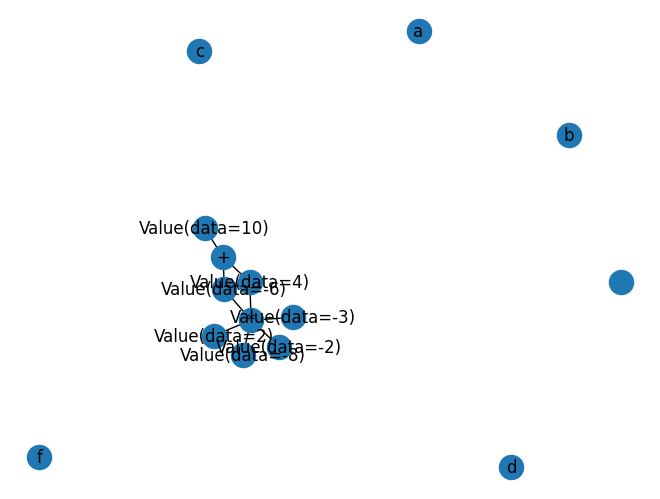

In [19]:
A = nx.Graph()

graph = generate_graph(A, L)

draw_graph(A)

## Activation Functions

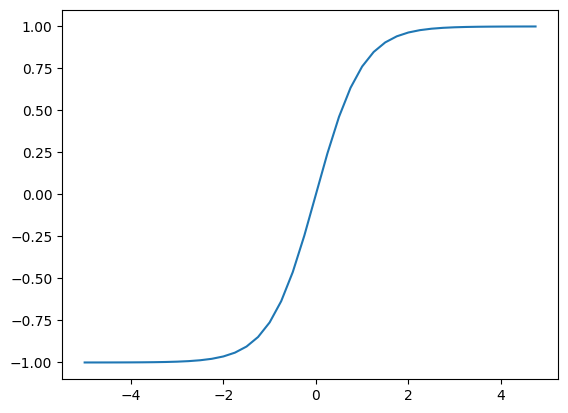

In [20]:
x = np.arange(-5, 5, 0.25)
y = np.tanh(x)

plt.grid(x, y)